In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [207]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### QUICK DATA CHECK

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [209]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Exploratory Data Analysis

## General Feature Exploration

In [210]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Dataframe has no null data** 

Text(0.5, 1.0, 'The balance of the class labels (Churn)')

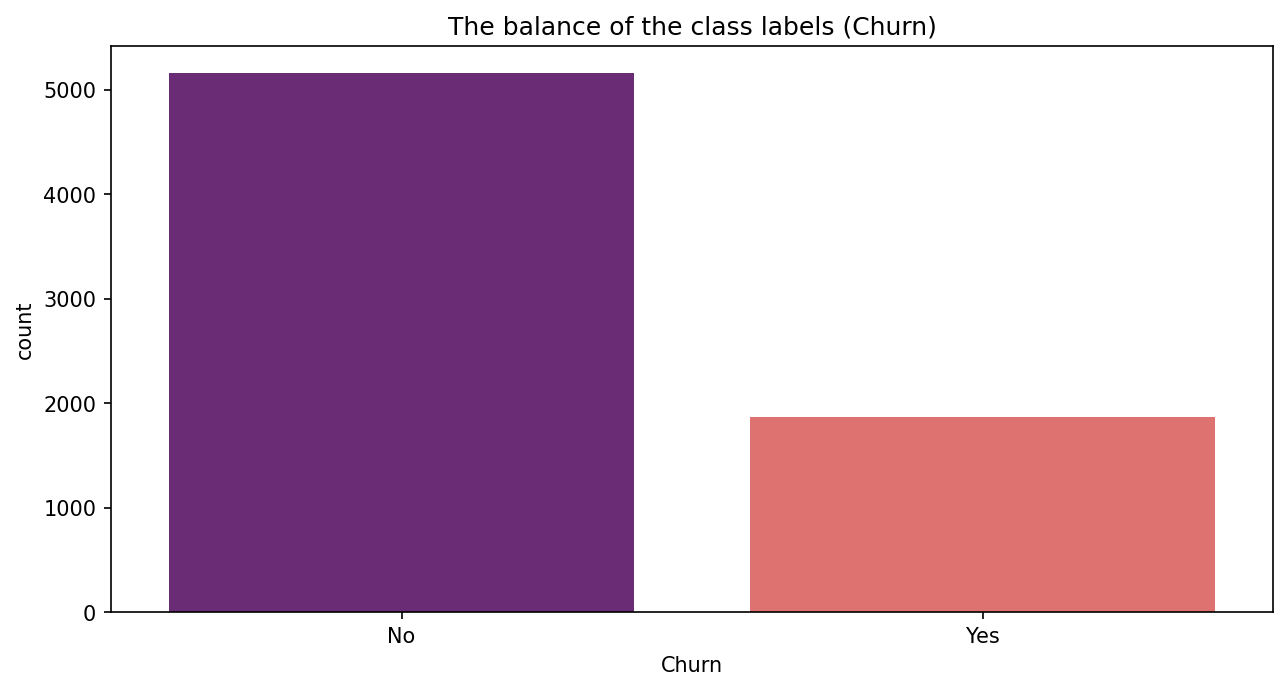

In [211]:
plt.figure(figsize=(10,5),dpi=150)
sns.countplot(x=df.Churn,palette='magma');
plt.title('The balance of the class labels (Churn)')

Text(0.5, 1.0, 'The distrbution of TotalCharges between Churn categories')

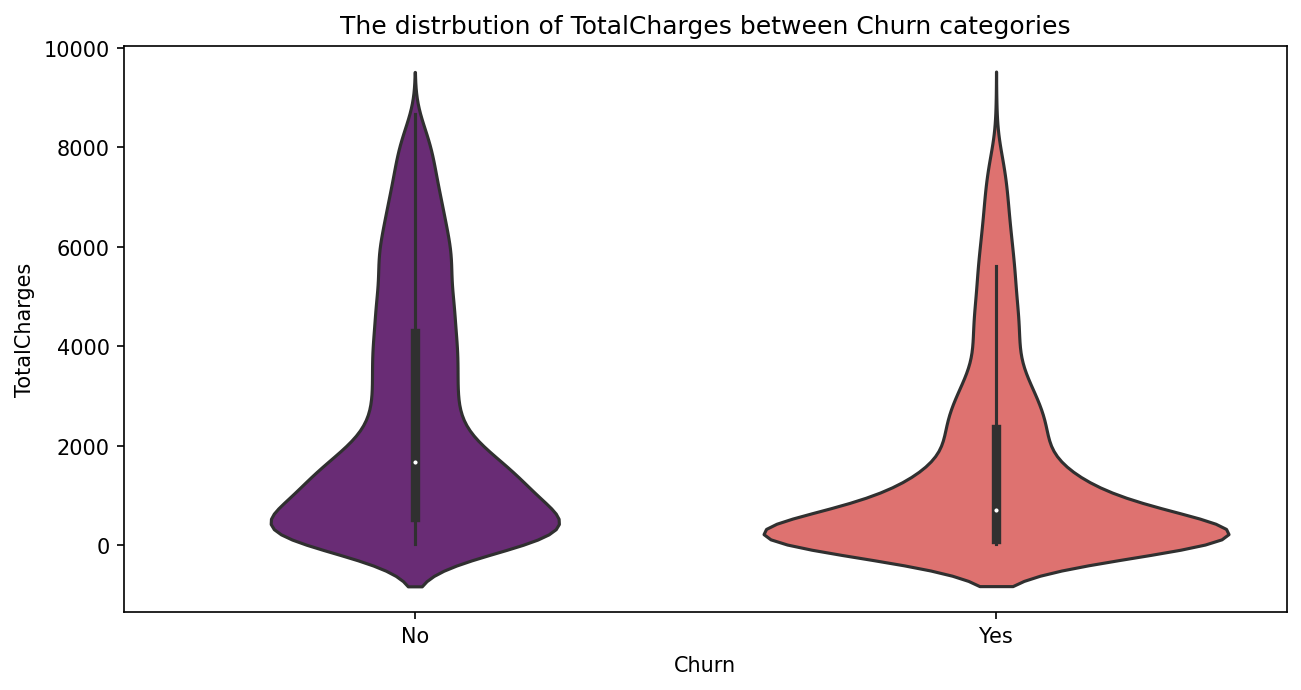

In [212]:
plt.figure(figsize=(10,5),dpi=150)
sns.violinplot(data = df ,x='Churn',y='TotalCharges',palette='magma');
plt.title('The distrbution of TotalCharges between Churn categories')

Text(0.5, 1.0, 'Boxplot showing the distribution of TotalCharges per Contract type')

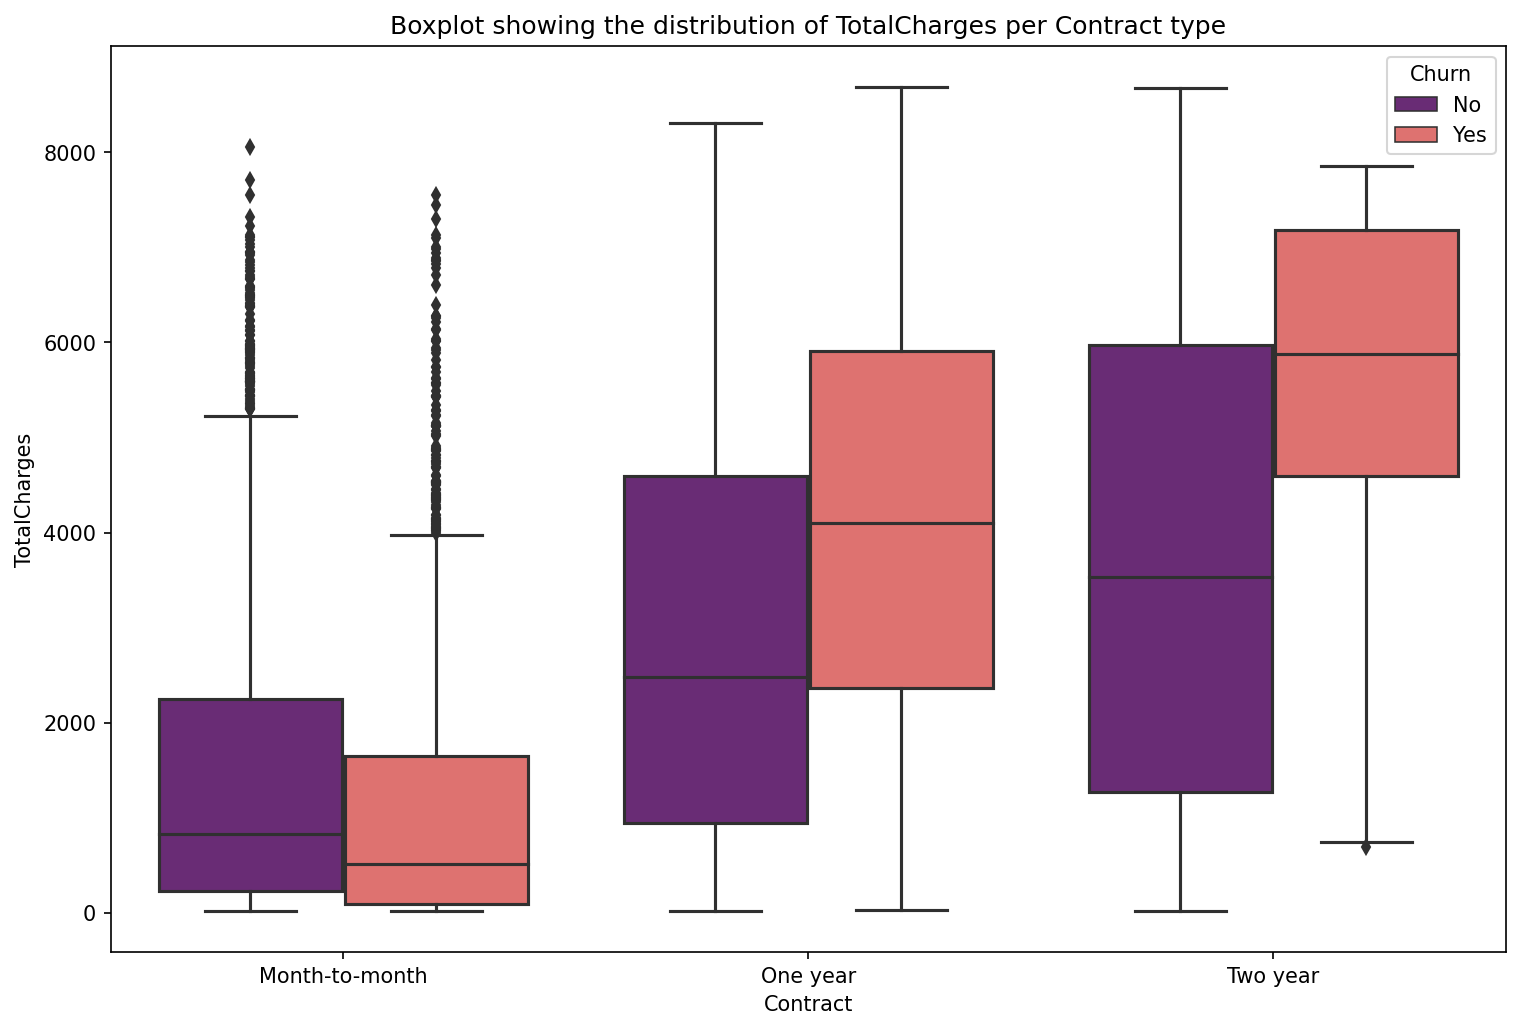

In [213]:
plt.figure(dpi=150,figsize=(12,8))
sns.boxplot(data = df ,x='Contract',y='TotalCharges',hue='Churn',palette='magma')
plt.title('Boxplot showing the distribution of TotalCharges per Contract type')

## Converting categorial variable to dummies so that we can the the corrilation between them

In [214]:
corr_df = pd.get_dummies(data = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]).corr()

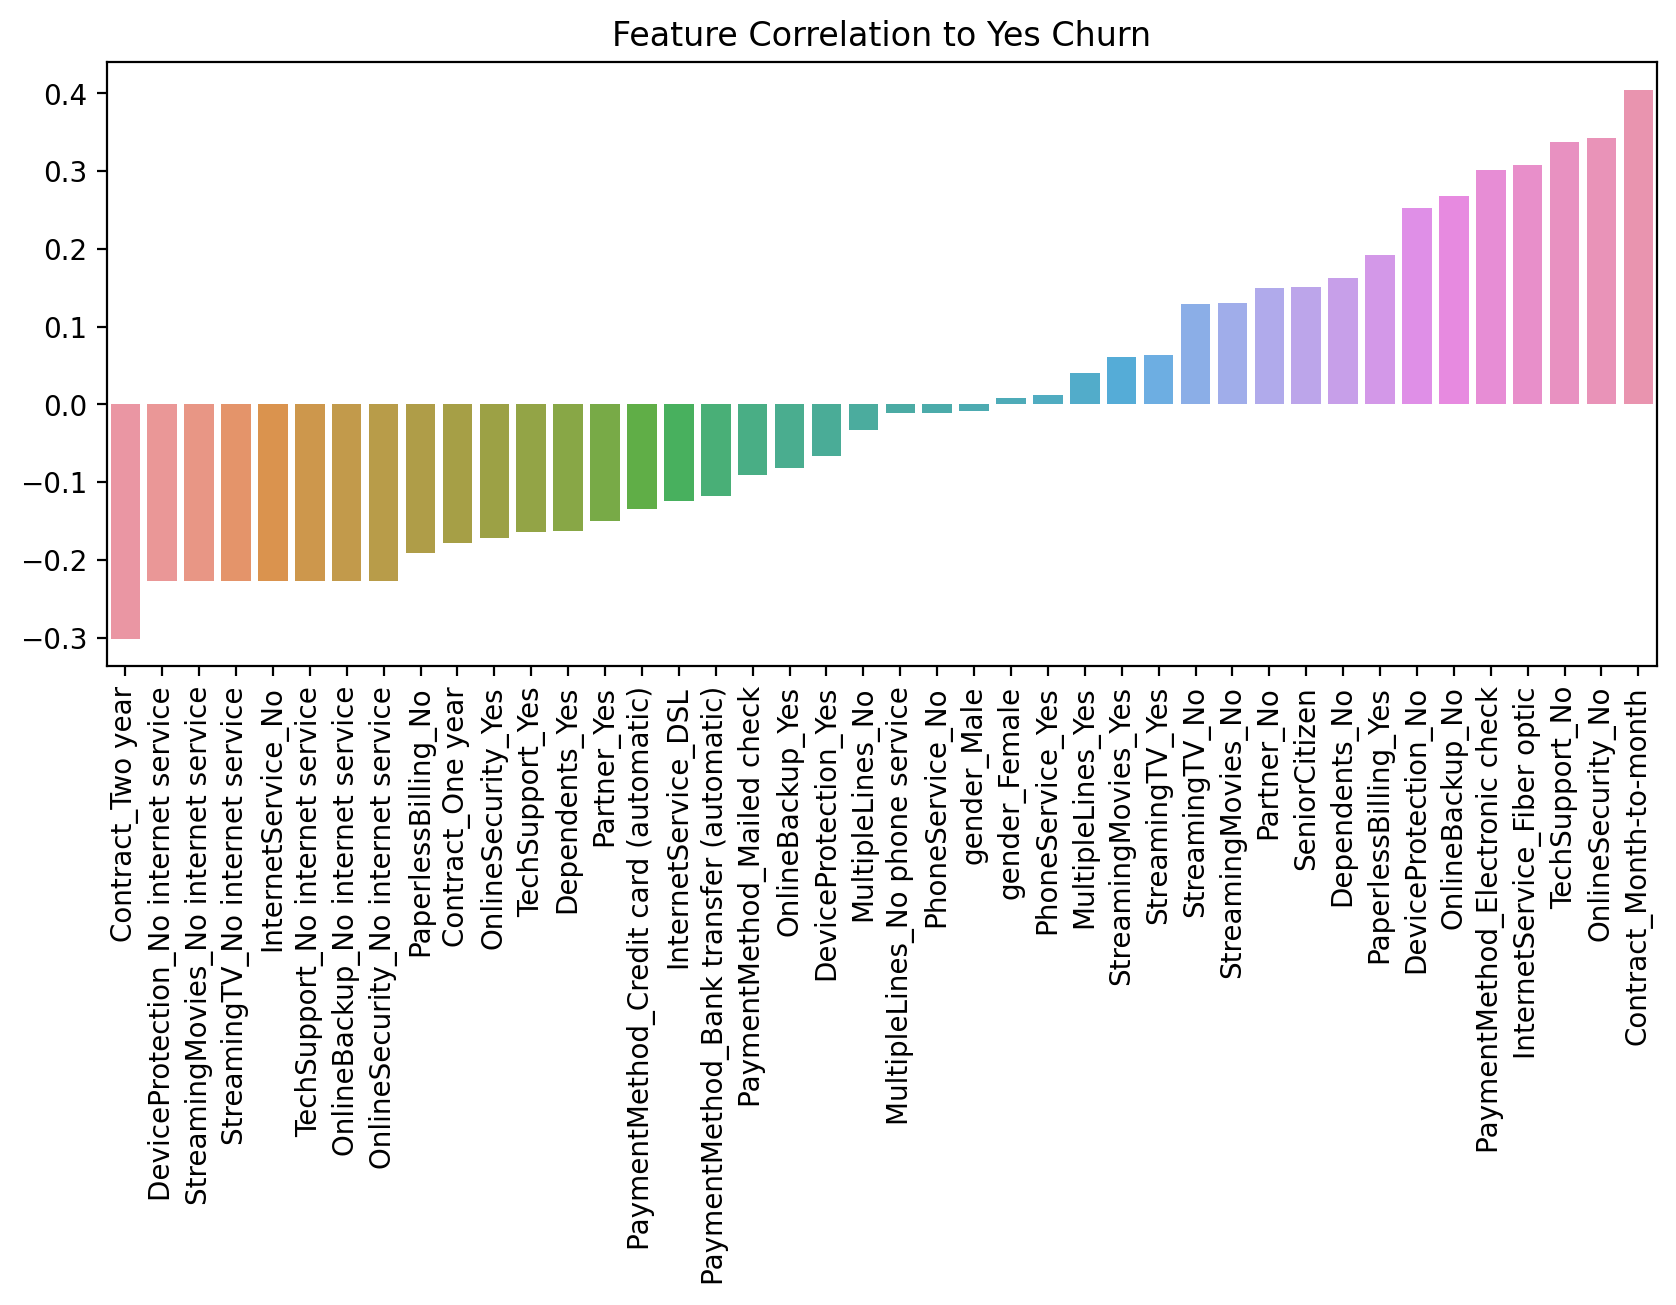

In [215]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

---
---

# Churn Analysis

**Focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

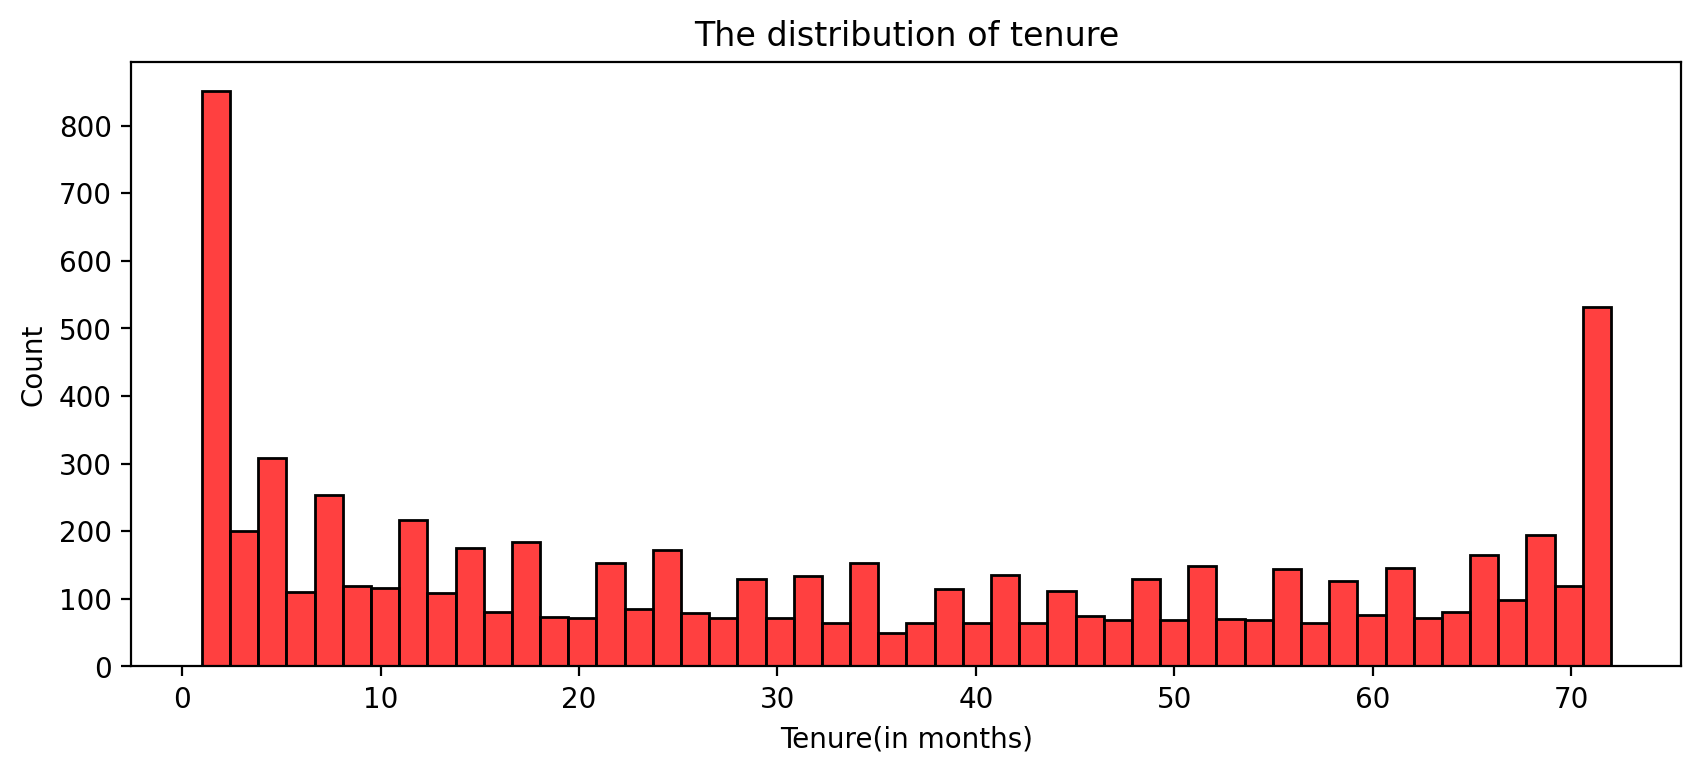

In [216]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='tenure',bins=50,color='red')
plt.title('The distribution of tenure')
plt.xlabel('Tenure(in months)')
plt.show()

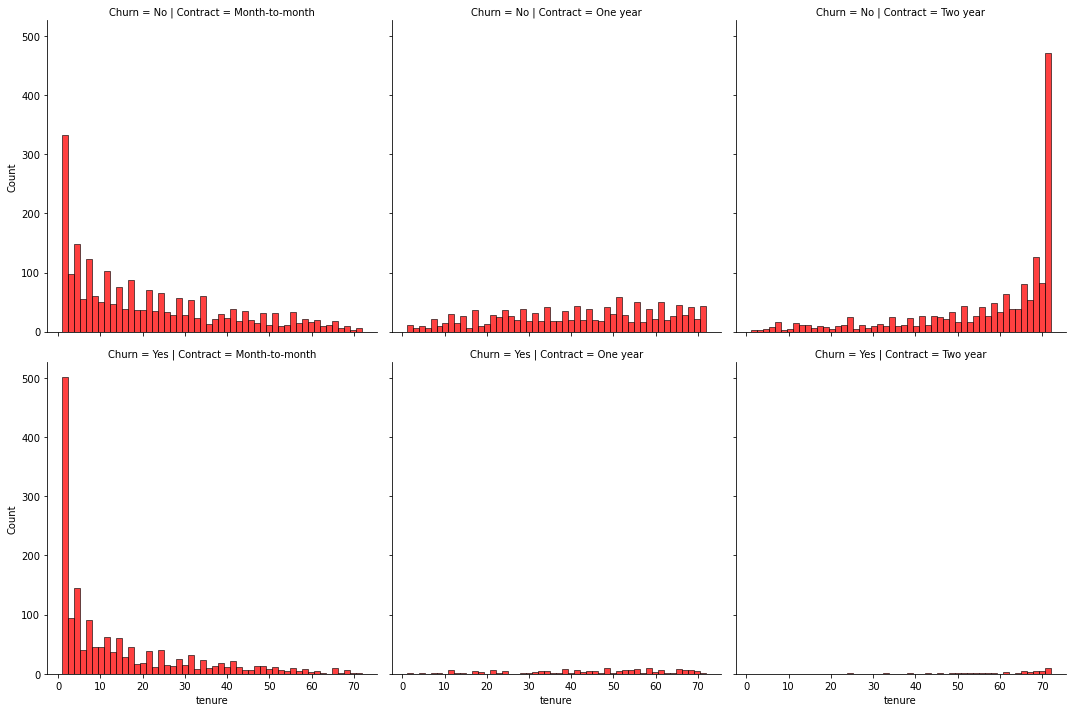

In [217]:
sns.displot(data=df,x='tenure',bins=50,col='Contract',row='Churn',color='red');

**Grid wise distribution of Tenure based on Contract type and  Churn**

---

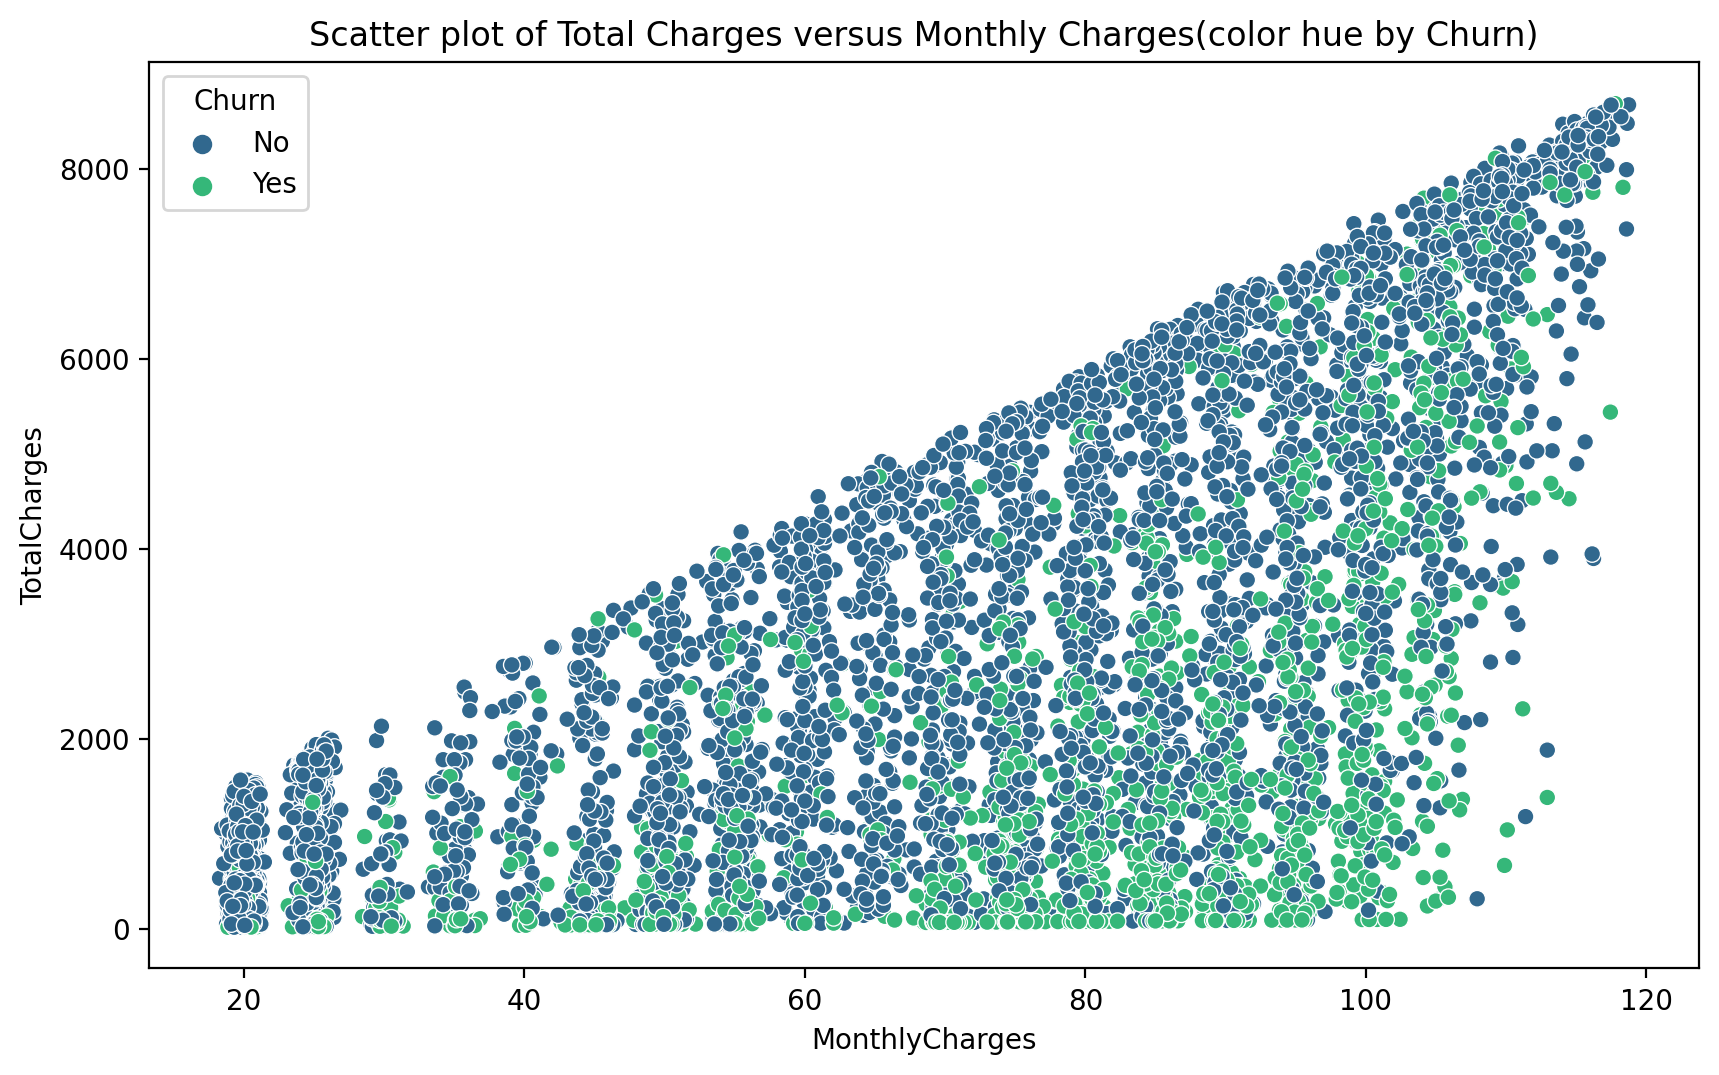

In [218]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x=df.MonthlyCharges,y=df.TotalCharges,hue=df.Churn,palette='viridis')
plt.title('Scatter plot of Total Charges versus Monthly Charges(color hue by Churn)')
plt.show()

---

### Calculating Churn percentage per Cohort

In [219]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [220]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

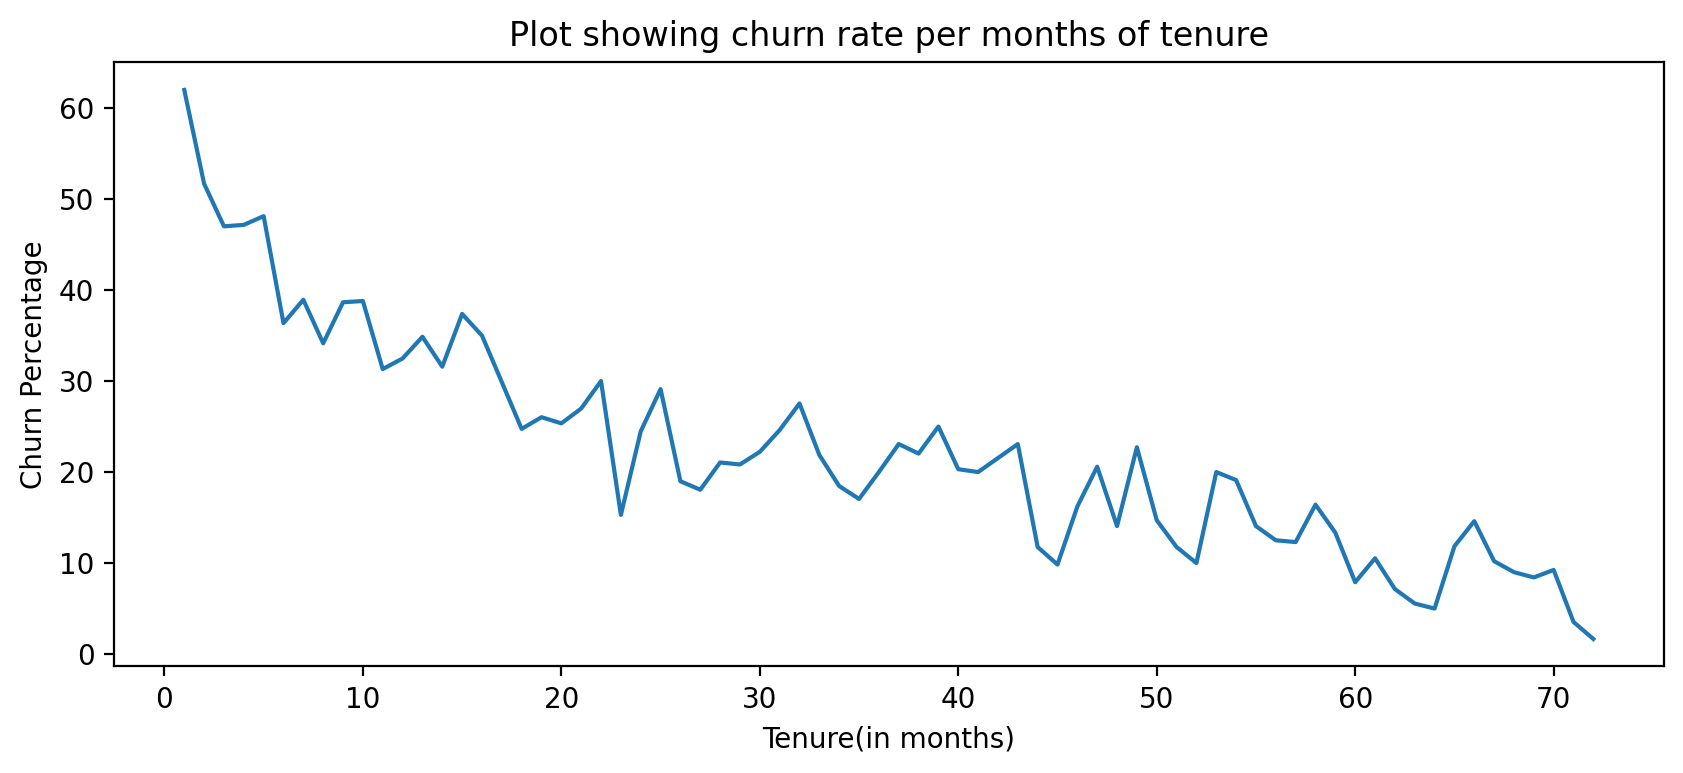

In [221]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage')
plt.title('Plot showing churn rate per months of tenure')
plt.xlabel('Tenure(in months)')
plt.show()

### Broader Cohort Groups
**Based on the tenure column values, creating a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'

In [222]:
def assign_range(num):
    if num < 12 :
        return '0-12 Months'
    elif num < 24 :
        return '12-24 Months'
    elif num < 48 :
        return '24-48 Months'
    else :
        return 'Over 48 Months'
    
df['Tenure Cohort'] = df.tenure.apply(assign_range)

In [223]:
df[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,24-48 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


---

### Scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort


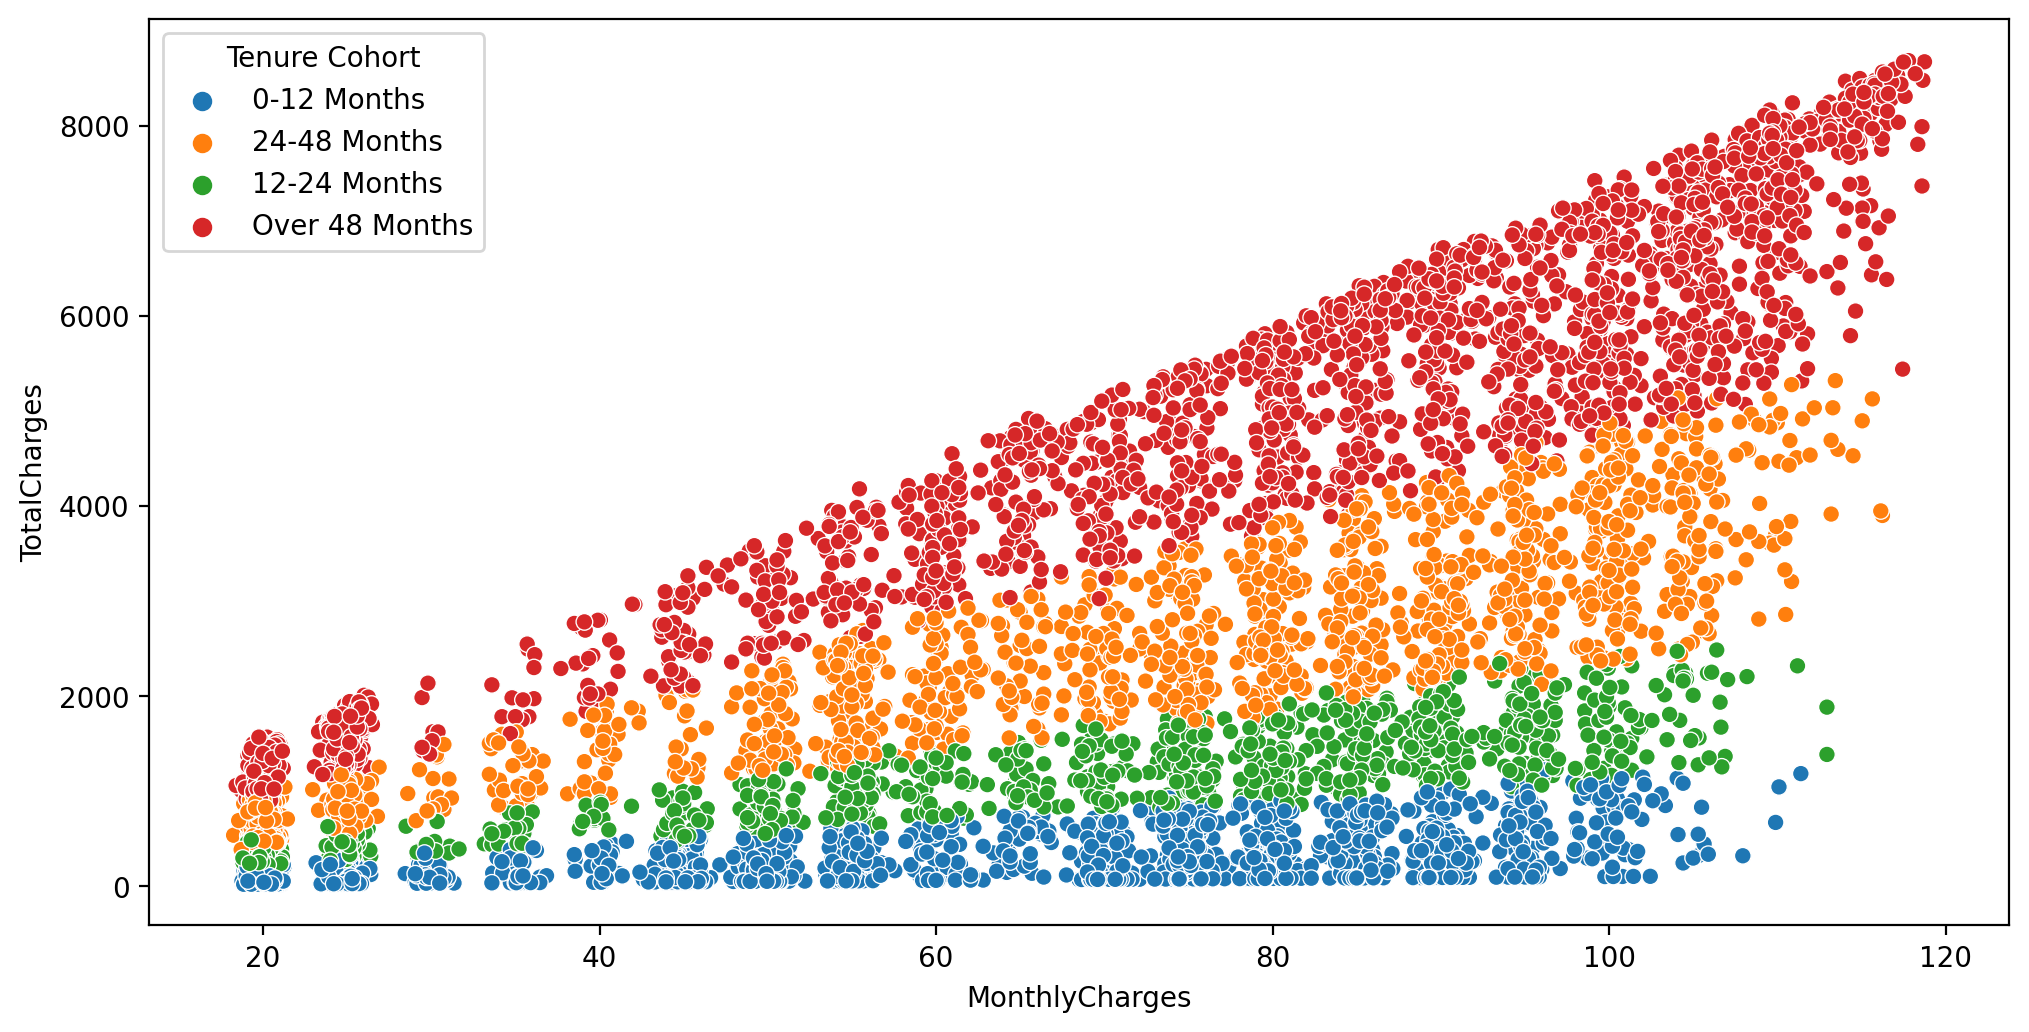

In [224]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data = df, x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort');
plt.savefig('Churn_Cohort_plot.png')

**Count plot showing the churn count per cohort.**

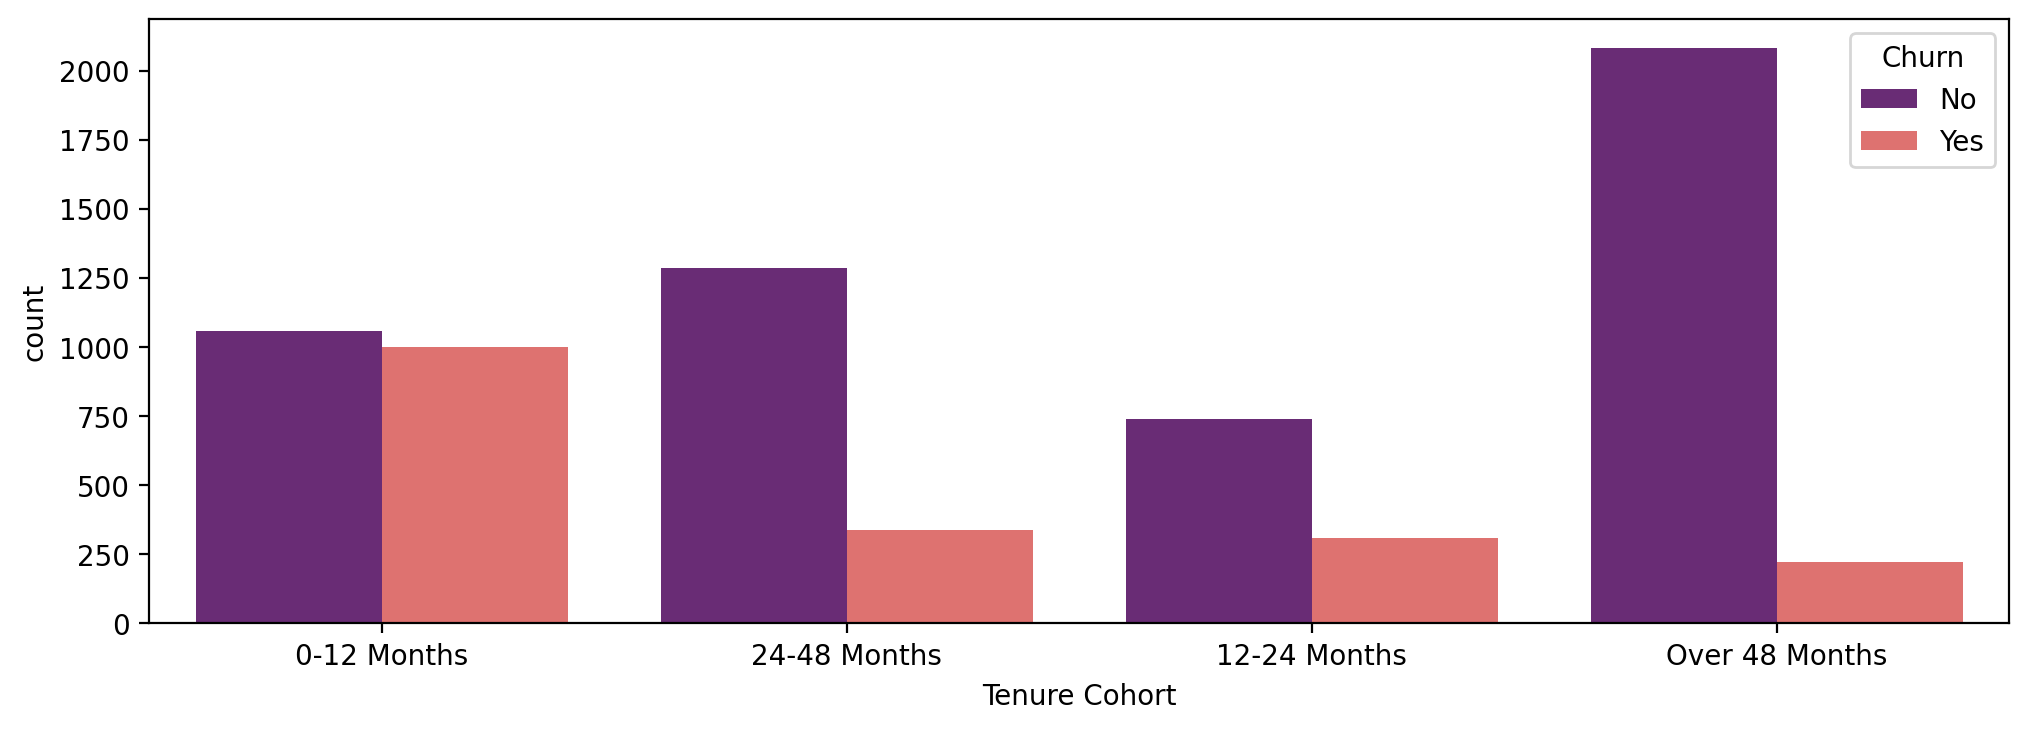

In [225]:
plt.figure(figsize=(12,4),dpi=200)
sns.countplot(x=df['Tenure Cohort'],hue=df.Churn,palette='magma');

**Grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue**

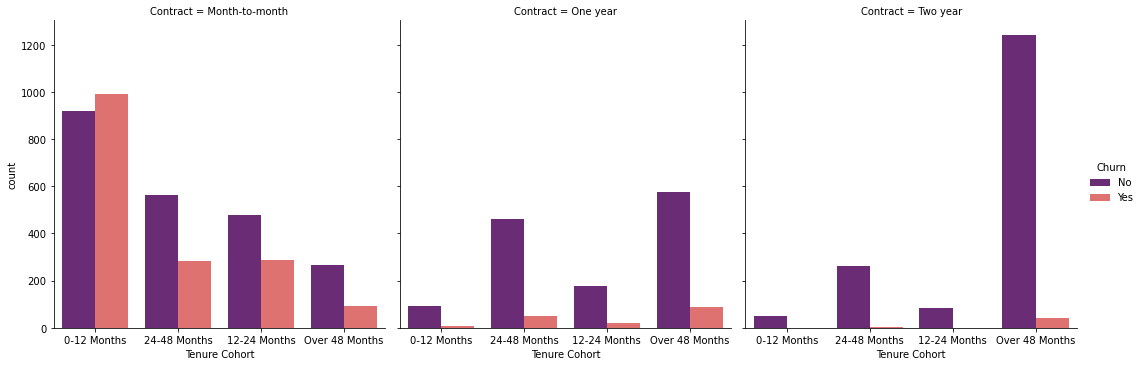

In [226]:
sns.catplot(data=df, x='Tenure Cohort',kind='count',col='Contract',hue='Churn',palette='magma');

---

# Predictive Modeling

In [227]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df.Churn

model_name = []
accuracy =[]

In [228]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

---

### Support Vector Classifier

In [229]:
from sklearn.svm import SVC

In [230]:
svc_model = SVC()

In [231]:
from sklearn.preprocessing import StandardScaler

In [232]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [233]:
svc_model.fit(scaled_X_train,y_train)

SVC()

In [234]:
svc_pred = svc_model.predict(scaled_X_test)

In [235]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix,classification_report

In [236]:
accuracy_score(y_test,svc_pred)

0.8037914691943128

In [237]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1580
         Yes       0.65      0.48      0.55       530

    accuracy                           0.80      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.79      0.80      0.79      2110



In [238]:
model_name.append('Support Vector Classifier')
accuracy.append(accuracy_score(y_test,svc_pred))

---

### KNN Classifier

In [239]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 

In [240]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [241]:
knn_model = KNeighborsClassifier()

In [242]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier()

In [243]:
knn_pred = knn_model.predict(scaled_X_test)

**Accuracy with default hyper parameters**

In [244]:
accuracy_score(y_test,knn_pred)

0.7677725118483413

**Finding most appropriate K**

In [245]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 1.0, 'K vs Error rate')

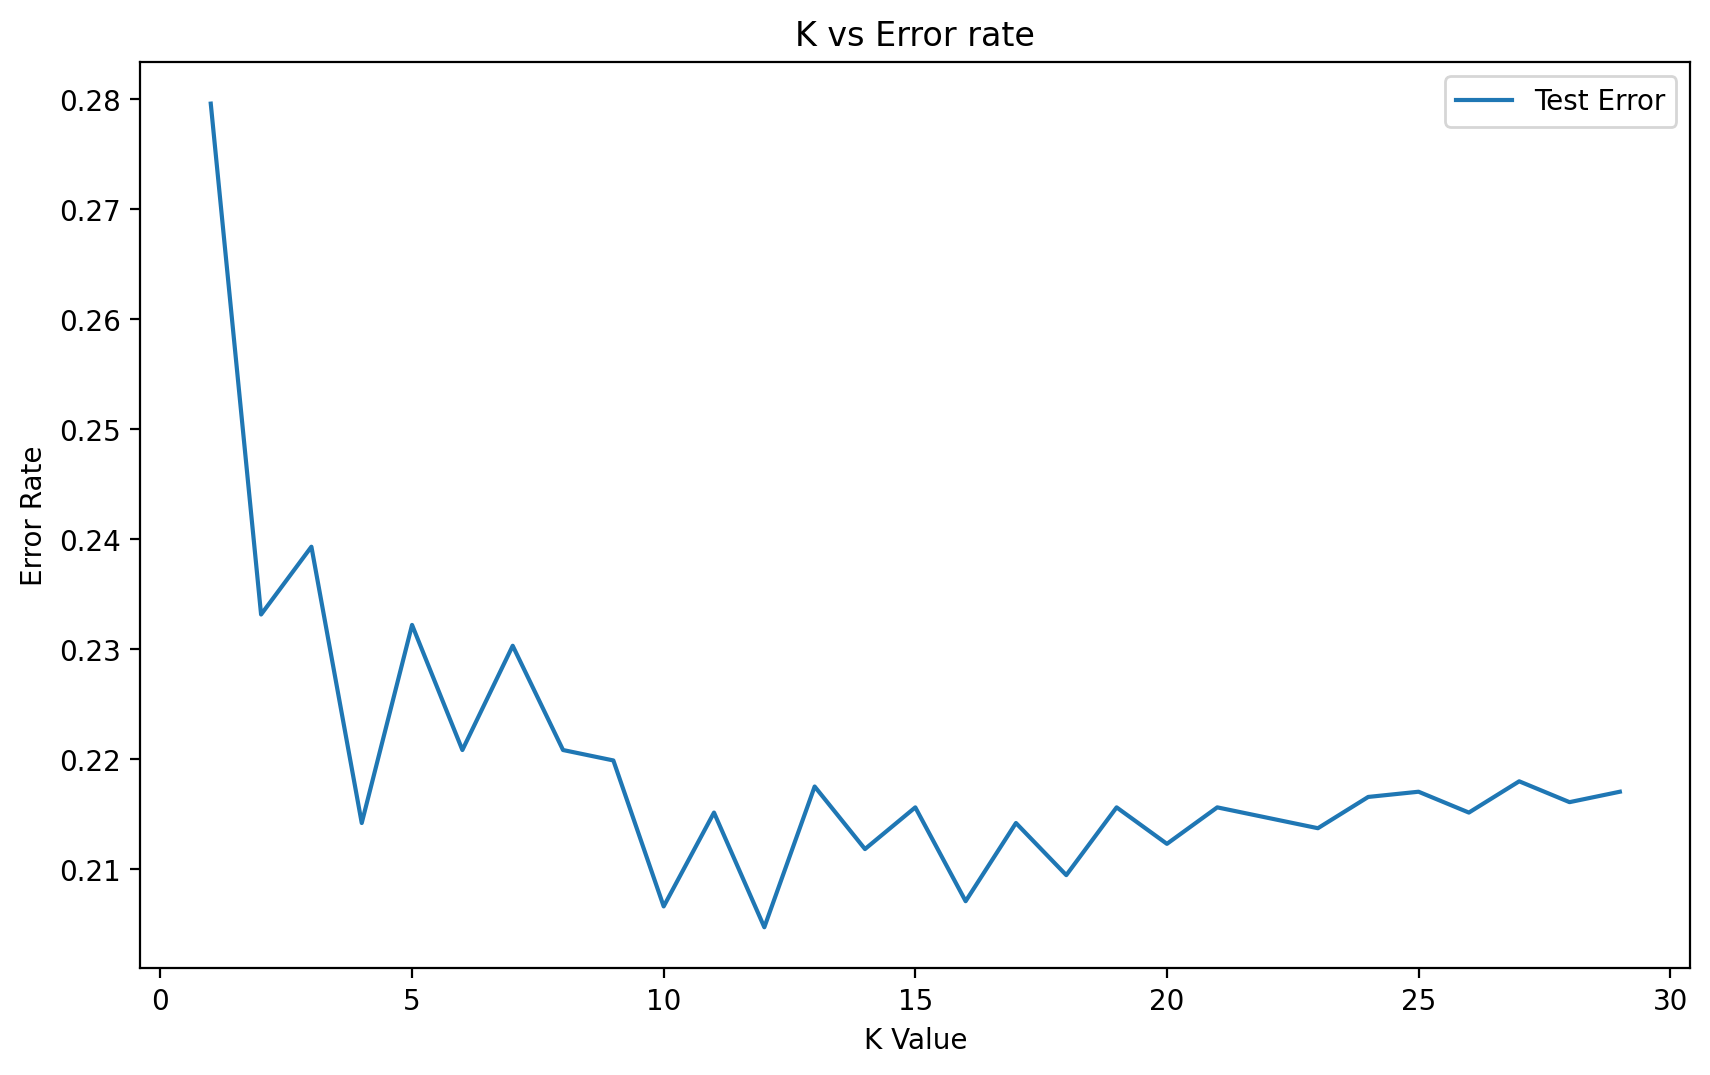

In [246]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")
plt.title('K vs Error rate')

In [247]:
test_error_rates.index(min(test_error_rates))

11

In [248]:
1 - min(test_error_rates)

0.795260663507109

**By the Plot we know the the most appropriate K value is 11 with a accuracy of 0.7952**

              precision    recall  f1-score   support

          No       0.84      0.85      0.85      1580
         Yes       0.54      0.52      0.53       530

    accuracy                           0.77      2110
   macro avg       0.69      0.69      0.69      2110
weighted avg       0.76      0.77      0.77      2110



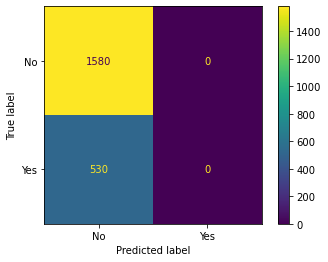

In [249]:
print(classification_report(y_test,knn_pred))
plot_confusion_matrix(knn_model,X_test,y_test);

In [250]:
model_name.append('KNN Model')
accuracy.append(accuracy_score(y_test,knn_pred))

---

## Decision Tree

In [251]:
from sklearn.tree import DecisionTreeClassifier

In [252]:
tree_model = DecisionTreeClassifier(max_depth=6)

In [253]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [254]:
tree_pred = tree_model.predict(X_test)

In [255]:
accuracy_score(y_test,tree_pred)

0.7966824644549763

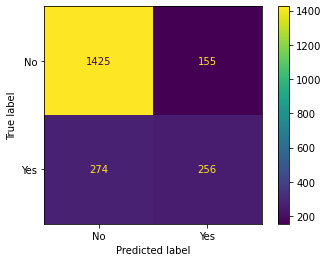

In [256]:
plot_confusion_matrix(tree_model,X_test,y_test);

In [257]:
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1580
         Yes       0.62      0.48      0.54       530

    accuracy                           0.80      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.80      0.79      2110



In [258]:
model_name.append('DecisionTreeClassifier')
accuracy.append(accuracy_score(y_test,tree_pred))

In [259]:
data = pd.DataFrame(data= tree_model.feature_importances_,index=X.columns,columns=['feature Importance']).sort_values('feature Importance')

In [260]:
data

,feature Importance
DeviceProtection_No internet service,0.000000
Tenure Cohort_12-24 Months,0.000000
PaymentMethod_Mailed check,0.000000
PaperlessBilling_Yes,0.000000
StreamingMovies_No internet service,0.000000
StreamingTV_Yes,0.000000
TechSupport_No internet service,0.000000
DeviceProtection_Yes,0.000000
Tenure Cohort_24-48 Months,0.000000
OnlineBackup_No internet service,0.000000


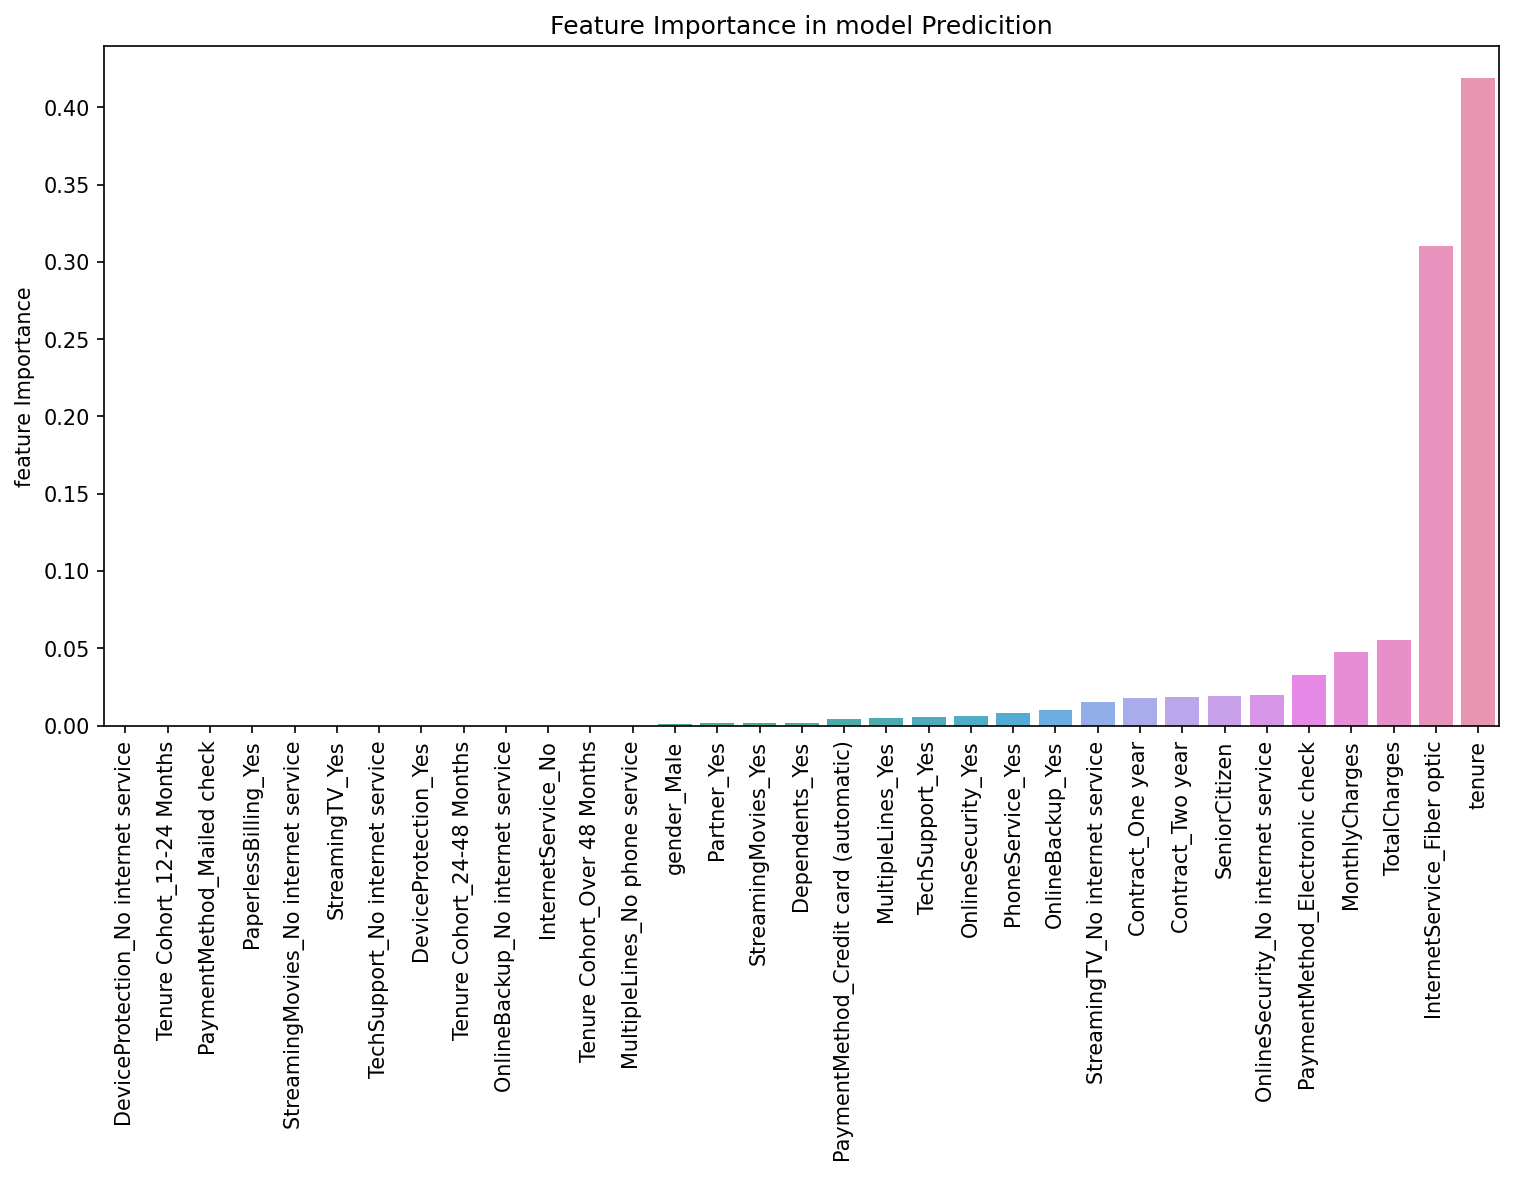

In [261]:
plt.figure(figsize=(12,6),dpi=150)
sns.barplot(x=data.index,y=data['feature Importance'])
plt.xticks(rotation=90)
plt.title('Feature Importance in model Predicition')
plt.show()

In [262]:
from sklearn.tree import plot_tree

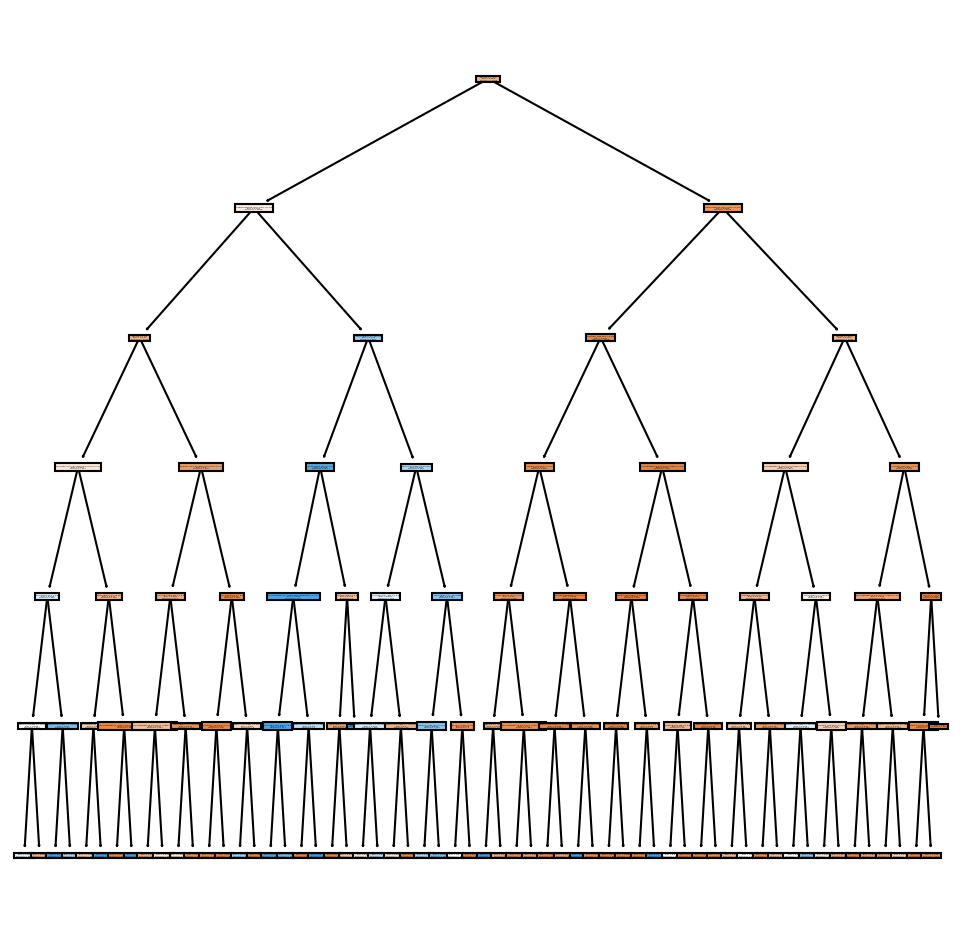

In [263]:
plt.figure(figsize=(8,8),dpi=150)
plot_tree(tree_model,filled=True,feature_names=X_train.columns);

---

## Random Forest

In [264]:
from sklearn.ensemble import RandomForestClassifier

In [265]:
rf_model = RandomForestClassifier()

In [266]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [267]:
rf_pred = rf_model.predict(X_test)

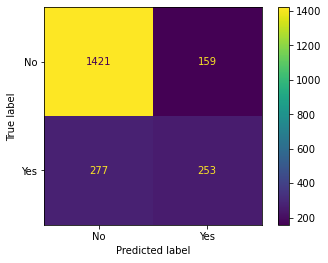

In [268]:
plot_confusion_matrix(rf_model,X_test,y_test);

In [269]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1580
         Yes       0.61      0.48      0.54       530

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110



In [270]:
model_name.append('RandomForestClassifier')
accuracy.append(accuracy_score(y_test,rf_pred))

---

## Boosted Trees

In [271]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [272]:
ada_model = AdaBoostClassifier()
gb_model = GradientBoostingClassifier()

In [273]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier()

In [274]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [275]:
ada_pred = ada_model.predict(X_test)

**AdaBoostClassifier Results**

In [276]:
accuracy_score(y_test,ada_pred)

0.8056872037914692

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1580
         Yes       0.63      0.55      0.59       530

    accuracy                           0.81      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



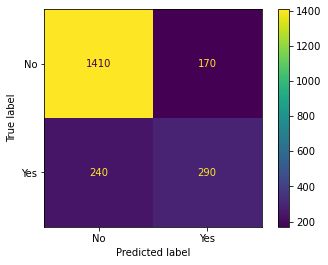

In [277]:
print(classification_report(y_test,ada_pred))
plot_confusion_matrix(ada_model,X_test,y_test);

In [278]:
model_name.append('AdaBoostClassifier')
accuracy.append(accuracy_score(y_test,ada_pred))

In [279]:
gb_pred = gb_model.predict(X_test)

**Gradient Boosting Classifer Results**

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1580
         Yes       0.65      0.52      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



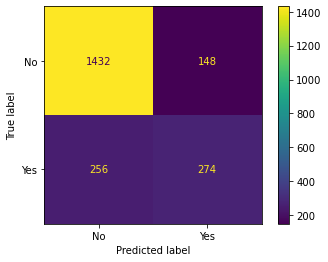

In [280]:
print(classification_report(y_test,gb_pred))
plot_confusion_matrix(gb_model,X_test,y_test);

In [281]:
model_name.append('GradientBoostingClassifier')
accuracy.append(accuracy_score(y_test,gb_pred))

---

## Results

In [282]:
report =pd.DataFrame(data = accuracy,index=model_name,columns=['Accuracy'])

In [283]:
report.sort_values('Accuracy')

,Accuracy
KNN Model,0.767773
RandomForestClassifier,0.793365
DecisionTreeClassifier,0.796682
Support Vector Classifier,0.803791
AdaBoostClassifier,0.805687
GradientBoostingClassifier,0.808531


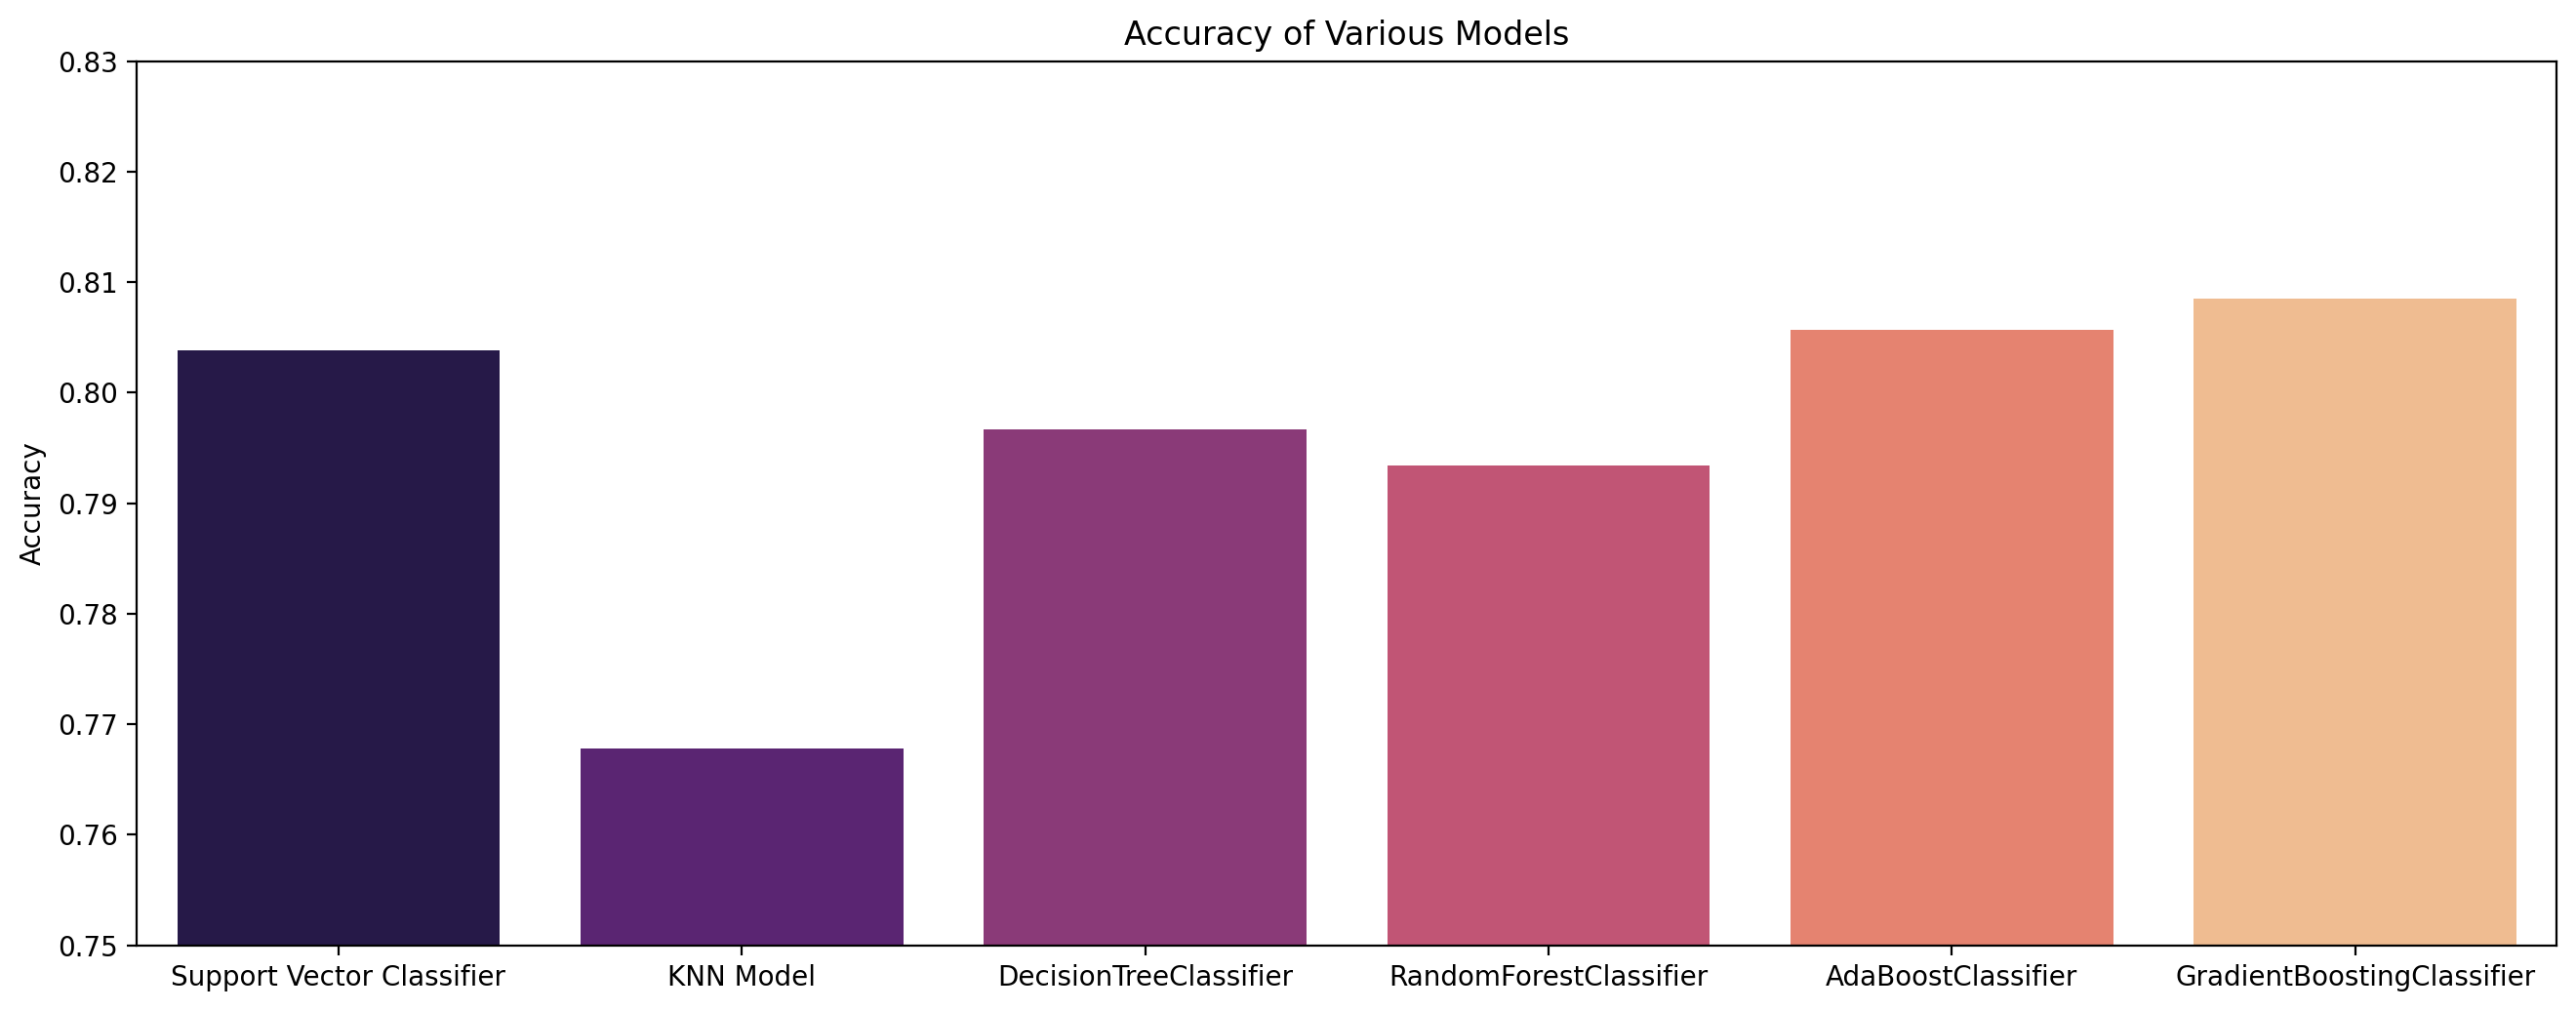

In [297]:
plt.figure(figsize=(16,6),dpi=200)
sns.barplot(x=report.index,y=report.Accuracy,palette='magma')
plt.xticks(rotation =0)
plt.title('Accuracy of Various Models')
plt.ylim(0.75,0.83)
plt.savefig('Model_Accuracies.png')
plt.show()

**Based on our Results the GradientBoostingClassifier,AdaBoostClassifier and Support Vector Classifier is performing almost the same so we can choose anyone of them. But after choosing a model we have to tune the hyper parameter and perform Cross Validation on it**

___

## Lets go with GradientBoostingClassifier

**Finding the best Estimator**

In [285]:
err_rate = []

for n in range(50,150,5):
    model = GradientBoostingClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    err = 1 - accuracy_score(y_test,pred)
    err_rate.append(err)
    

Text(0.5, 1.0, 'Number of Estimator vs Error rate')

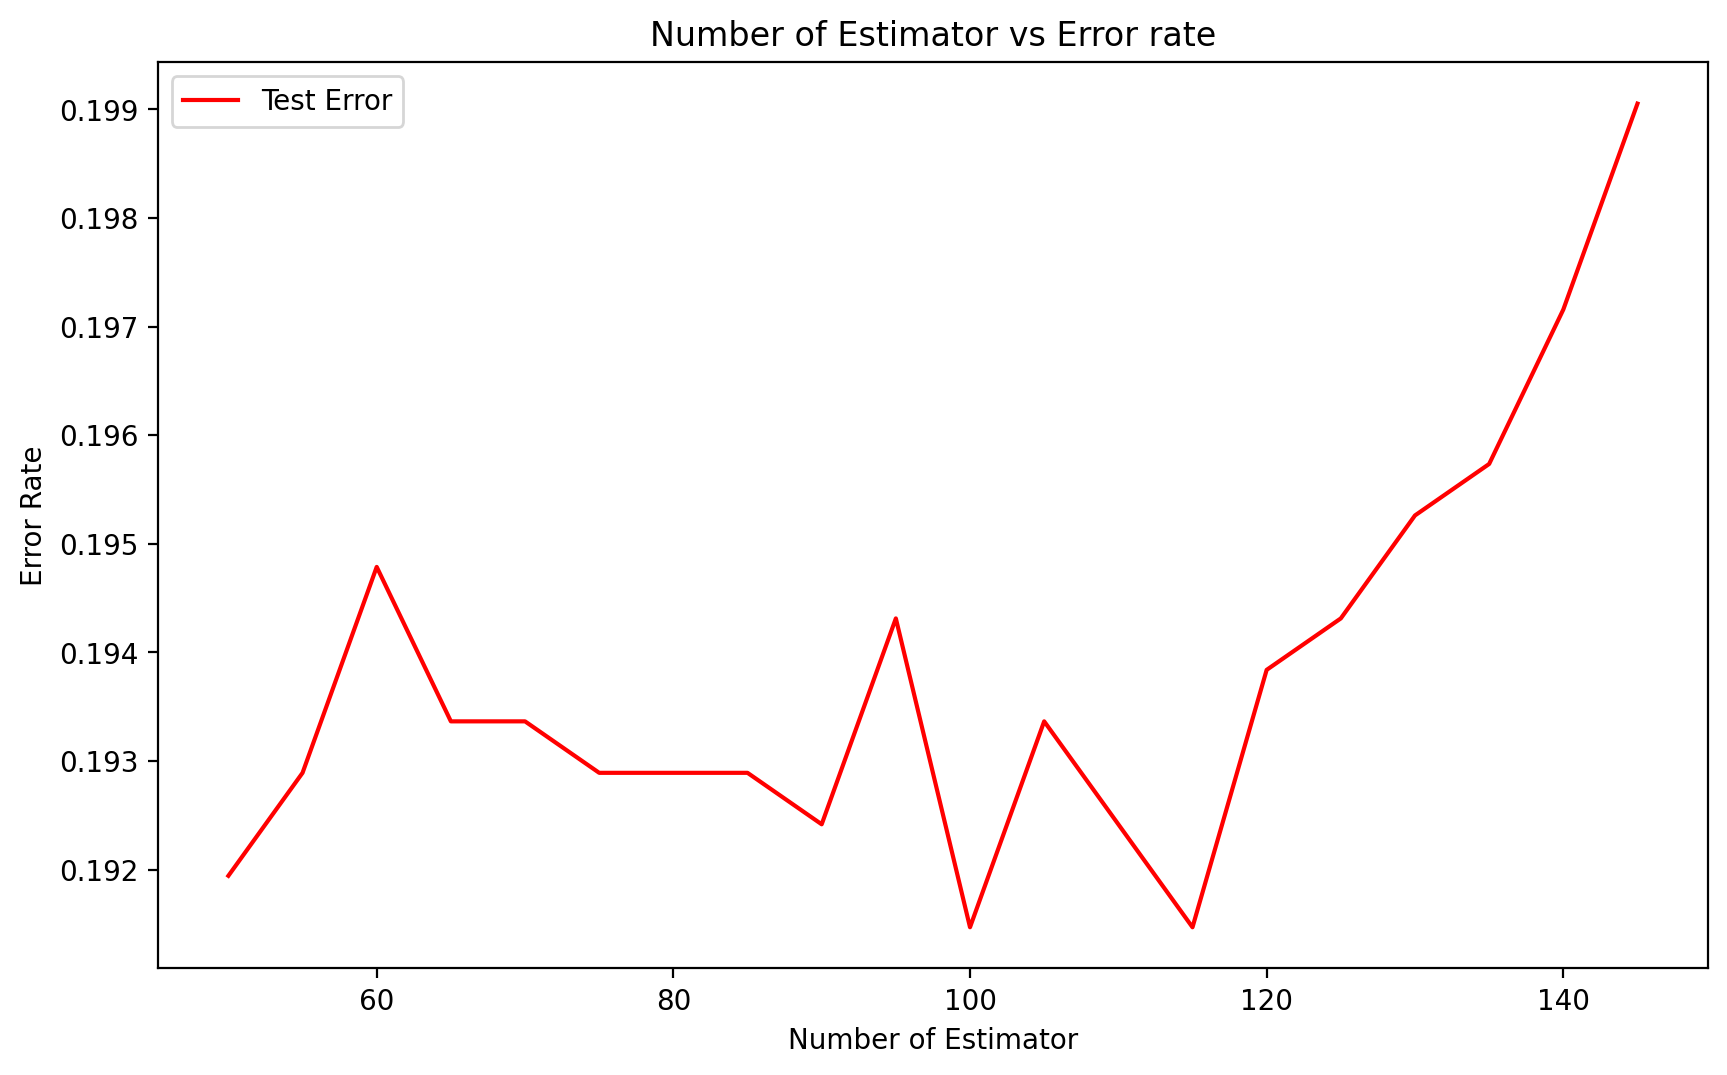

In [286]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(50,150,5),err_rate,label='Test Error',c='r')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("Number of Estimator")
plt.title('Number of Estimator vs Error rate')

In [287]:
pd.DataFrame(data= err_rate,index=range(50,150,5),columns=['Error Rate']).sort_values('Error Rate').head()

,Error Rate
100,0.191469
115,0.191469
50,0.191943
90,0.192417
110,0.192417


**Above data emplies that best number of estimator is 100 (default value)**

---
---

### Fitting Final model 

In [288]:
final_model = GradientBoostingClassifier(n_estimators=100)

In [289]:
final_model.fit(X,y)

GradientBoostingClassifier()

---
### Saving Model

In [290]:
from joblib import load ,dump

In [291]:
dump(final_model,'Churn_Analysis_model.joblib')

['Churn_Analysis_model.joblib']

In [292]:
dump(X.columns,'column_name.pkl')

['column_name.pkl']

In [293]:
report.to_csv('report.csv')

---
### Loading Model

In [294]:
model = load('Churn_Analysis_model.joblib')

In [295]:
data=pd.get_dummies(X,drop_first=True).iloc[52].values

In [296]:
model.predict(list([data]))

array(['No'], dtype=object)